In [5]:
import pandas as pd
import yfinance as yf
import numpy as np

In [6]:
df = yf.download('PLTR', start='2023-11-24', interval="1m")

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['PLTR']: Exception('%ticker%: 1m data not available for startTime=1700802000 and endTime=1701541319. Only 7 days worth of 1m granularity data are allowed to be fetched per request.')


In [7]:
def strategy(df, window=1):
    df = df.copy()
    df["ret"] = np.log(df.Close.pct_change() + 1)
    df["prior_n"] = df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df["position"] = [1 if i > 0 else -1 for i in df.prior_n]
    df["strat"] = df.position.shift(1) * df.ret
    return np.exp(df[["ret", "strat"]].cumsum()).plot(figsize=(12,6))

In [8]:
strategy(df, window=1)

ValueError: attempt to get argmax of an empty sequence

In [ ]:
def strategy(df, window=1):
    df = df.copy()
    df["ret"] = np.log(df.Close.pct_change() + 1)
    df["prior_n"] = df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df["position"] = [1 if i > 0 else 0 for i in df.prior_n]
    df["strat"] = df.position.shift(1) * df.ret
    return np.exp(df[["ret", "strat"]].cumsum()).plot(figsize=(12,6))

In [ ]:
df1 = yf.download("BTC-USD", start="2023-11-26", interval='5m')

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Datetime'>

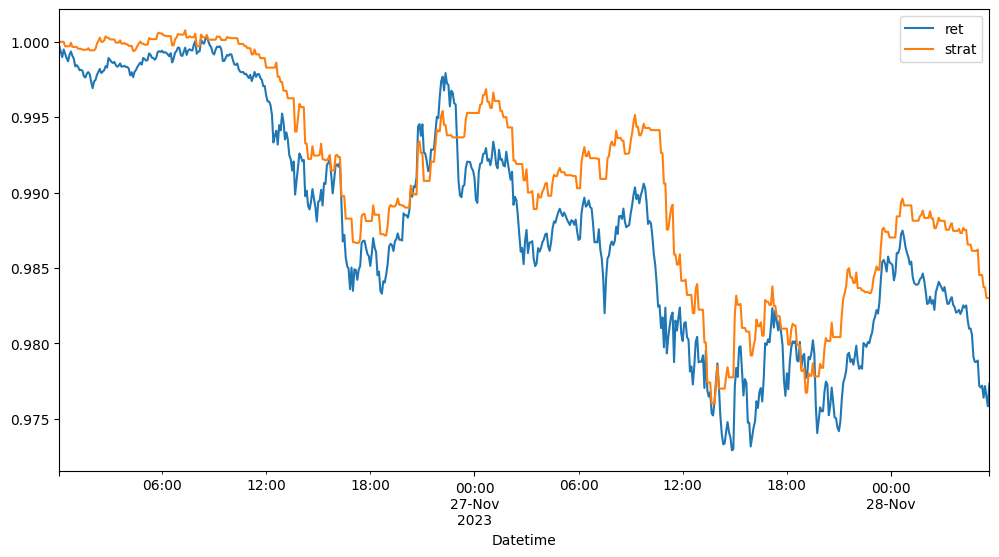

In [ ]:
strategy(df1, window=1)

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Datetime'>

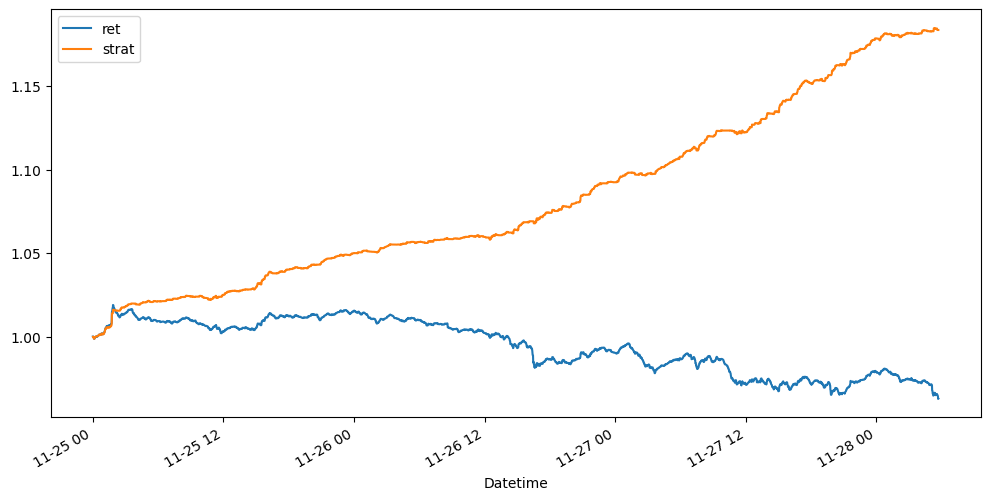

In [ ]:
strategy(yf.download("LTC-USD", start="2023-11-25", interval='1m'), window=1)